# Binary Classification - Credit Approval

Dataset:
https://archive.ics.uci.edu/ml/datasets/Credit+Approval

## Dataset observations

https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.names

- Class distribution is quite balanced
- Columns are anonymized
- There are missing values

## Workflow

Data Gathering
1. read_csv

Data Transformation
2. transform dataframe
3. PCA to plot (for classification)
4. train-test split
5. scale

Training
6. logistic regression
7. SGD logistic regression

Validation
8. metrics
9. learning curve
10. prediction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import learning_curve

## Data Gathering

1. read_csv

In [3]:
df = pd.read_csv('/tmp/credit-approval/crx.data',
                names=['A1', 'A2', 'A3', 'A4', 'A5', 'A6',
                      'A7', 'A8', 'A9', 'A10', 'A11', 'A12',
                      'A13', 'A14', 'A15', 'y'],
                na_values=['?', 'nan'])
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,y
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


## Data Transformation
2. transform dataframe
3. PCA to plot (for classification)
4. train-test split
5. scale

2. transform dataframe
  - change to numeric types
  - handle NaN values

In [4]:
# since we cannot interpolate the values, we'll drop them
# drop the NaN values before we perform encoding
df.dropna(inplace=True)

In [5]:
df.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14    float64
A15      int64
y       object
dtype: object

In [6]:
df.A1.unique()

array(['b', 'a'], dtype=object)

In [7]:
df.A4.unique()

array(['u', 'y', 'l'], dtype=object)

In [8]:
# let's try one-hot encoding
columns_to_encode = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']
np.testing.assert_array_equal(columns_to_encode, df.loc[:, columns_to_encode].columns)

dummies = pd.get_dummies(df.loc[:, columns_to_encode])
dummies.columns

Index(['A1_a', 'A1_b', 'A4_l', 'A4_u', 'A4_y', 'A5_g', 'A5_gg', 'A5_p',
       'A6_aa', 'A6_c', 'A6_cc', 'A6_d', 'A6_e', 'A6_ff', 'A6_i', 'A6_j',
       'A6_k', 'A6_m', 'A6_q', 'A6_r', 'A6_w', 'A6_x', 'A7_bb', 'A7_dd',
       'A7_ff', 'A7_h', 'A7_j', 'A7_n', 'A7_o', 'A7_v', 'A7_z', 'A9_f', 'A9_t',
       'A10_f', 'A10_t', 'A12_f', 'A12_t', 'A13_g', 'A13_p', 'A13_s'],
      dtype='object')

In [9]:
df_1 = pd.concat([df, dummies], axis=1)
df_1.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'y', 'A1_a', 'A1_b', 'A4_l', 'A4_u', 'A4_y',
       'A5_g', 'A5_gg', 'A5_p', 'A6_aa', 'A6_c', 'A6_cc', 'A6_d', 'A6_e',
       'A6_ff', 'A6_i', 'A6_j', 'A6_k', 'A6_m', 'A6_q', 'A6_r', 'A6_w', 'A6_x',
       'A7_bb', 'A7_dd', 'A7_ff', 'A7_h', 'A7_j', 'A7_n', 'A7_o', 'A7_v',
       'A7_z', 'A9_f', 'A9_t', 'A10_f', 'A10_t', 'A12_f', 'A12_t', 'A13_g',
       'A13_p', 'A13_s'],
      dtype='object')

In [10]:
# let's clean up some columns
df_1.drop(columns_to_encode, axis=1, inplace=True)
df_1.columns

Index(['A2', 'A3', 'A8', 'A11', 'A14', 'A15', 'y', 'A1_a', 'A1_b', 'A4_l',
       'A4_u', 'A4_y', 'A5_g', 'A5_gg', 'A5_p', 'A6_aa', 'A6_c', 'A6_cc',
       'A6_d', 'A6_e', 'A6_ff', 'A6_i', 'A6_j', 'A6_k', 'A6_m', 'A6_q', 'A6_r',
       'A6_w', 'A6_x', 'A7_bb', 'A7_dd', 'A7_ff', 'A7_h', 'A7_j', 'A7_n',
       'A7_o', 'A7_v', 'A7_z', 'A9_f', 'A9_t', 'A10_f', 'A10_t', 'A12_f',
       'A12_t', 'A13_g', 'A13_p', 'A13_s'],
      dtype='object')

In [11]:
# now check to make sure dtypes are all numeric
df_1.dtypes

A2       float64
A3       float64
A8       float64
A11        int64
A14      float64
A15        int64
y         object
A1_a       uint8
A1_b       uint8
A4_l       uint8
A4_u       uint8
A4_y       uint8
A5_g       uint8
A5_gg      uint8
A5_p       uint8
A6_aa      uint8
A6_c       uint8
A6_cc      uint8
A6_d       uint8
A6_e       uint8
A6_ff      uint8
A6_i       uint8
A6_j       uint8
A6_k       uint8
A6_m       uint8
A6_q       uint8
A6_r       uint8
A6_w       uint8
A6_x       uint8
A7_bb      uint8
A7_dd      uint8
A7_ff      uint8
A7_h       uint8
A7_j       uint8
A7_n       uint8
A7_o       uint8
A7_v       uint8
A7_z       uint8
A9_f       uint8
A9_t       uint8
A10_f      uint8
A10_t      uint8
A12_f      uint8
A12_t      uint8
A13_g      uint8
A13_p      uint8
A13_s      uint8
dtype: object

In [12]:
# the last one we deal with is class
# since this is the classification output, the convention is to use 1, 0
df_1.y.unique()

array(['+', '-'], dtype=object)

In [13]:
# We can use sklearn.preprocessing.LabelEncoder, but that doesn't give us the
# ability to assign labels to numbers. For example, if we want '+' to be 1,
# and '-' to be 0. This is because LabelEncoder picks the first class it encounters
# and assigned the number accordingly.

y_enc = df_1.y.map({'+': 1, '-': 0})
y_enc

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
659    0
660    0
661    0
662    0
663    0
664    0
665    0
666    0
667    0
668    0
669    0
670    0
671    0
672    0
674    0
675    0
676    0
677    0
678    0
679    0
680    0
681    0
682    0
683    0
684    0
685    0
686    0
687    0
688    0
689    0
Name: y, Length: 653, dtype: int64

In [14]:
df_1.drop(['y'], axis=1, inplace=True) # drop the original y column
df_2 = pd.concat([df_1, y_enc], axis=1) # add the encoded y column
df_2.columns

Index(['A2', 'A3', 'A8', 'A11', 'A14', 'A15', 'A1_a', 'A1_b', 'A4_l', 'A4_u',
       'A4_y', 'A5_g', 'A5_gg', 'A5_p', 'A6_aa', 'A6_c', 'A6_cc', 'A6_d',
       'A6_e', 'A6_ff', 'A6_i', 'A6_j', 'A6_k', 'A6_m', 'A6_q', 'A6_r', 'A6_w',
       'A6_x', 'A7_bb', 'A7_dd', 'A7_ff', 'A7_h', 'A7_j', 'A7_n', 'A7_o',
       'A7_v', 'A7_z', 'A9_f', 'A9_t', 'A10_f', 'A10_t', 'A12_f', 'A12_t',
       'A13_g', 'A13_p', 'A13_s', 'y'],
      dtype='object')

In [15]:
df_2.dtypes

A2       float64
A3       float64
A8       float64
A11        int64
A14      float64
A15        int64
A1_a       uint8
A1_b       uint8
A4_l       uint8
A4_u       uint8
A4_y       uint8
A5_g       uint8
A5_gg      uint8
A5_p       uint8
A6_aa      uint8
A6_c       uint8
A6_cc      uint8
A6_d       uint8
A6_e       uint8
A6_ff      uint8
A6_i       uint8
A6_j       uint8
A6_k       uint8
A6_m       uint8
A6_q       uint8
A6_r       uint8
A6_w       uint8
A6_x       uint8
A7_bb      uint8
A7_dd      uint8
A7_ff      uint8
A7_h       uint8
A7_j       uint8
A7_n       uint8
A7_o       uint8
A7_v       uint8
A7_z       uint8
A9_f       uint8
A9_t       uint8
A10_f      uint8
A10_t      uint8
A12_f      uint8
A12_t      uint8
A13_g      uint8
A13_p      uint8
A13_s      uint8
y          int64
dtype: object

In [16]:
df_2.describe()

,A2,A3,A8,A11,A14,A15,A1_a,A1_b,A4_l,A4_u,...,A9_f,A9_t,A10_f,A10_t,A12_f,A12_t,A13_g,A13_p,A13_s,y
count,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,...,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000
mean,31.503813,4.829533,2.244296,2.502297,180.359877,1013.761103,0.310873,0.689127,0.003063,0.764165,...,0.465544,0.534456,0.560490,0.439510,0.537519,0.462481,0.915773,0.003063,0.081164,0.453292
std,11.838267,5.027077,3.371120,4.968497,168.296811,5253.278504,0.463206,0.463206,0.055300,0.424845,...,0.499194,0.499194,0.496708,0.496708,0.498973,0.498973,0.277940,0.055300,0.273296,0.498195
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.580000,1.040000,0.165000,0.000000,73.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,28.420000,2.835000,1.000000,0.000000,160.000000,5.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,38.250000,7.500000,2.625000,3.000000,272.000000,400.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,76.750000,28.000000,28.500000,67.000000,2000.000000,100000.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


2. PCA to plot (for classification)

  - Plot a scatter plot with 2 feature dimensions (or 3 feature dimensions)  
  - Use colours for y_enc

In [17]:
pca = PCA(n_components=3)

X = df_2.loc[:, 'A2':'A13_s']
y = df_2.y

X.columns

Index(['A2', 'A3', 'A8', 'A11', 'A14', 'A15', 'A1_a', 'A1_b', 'A4_l', 'A4_u',
       'A4_y', 'A5_g', 'A5_gg', 'A5_p', 'A6_aa', 'A6_c', 'A6_cc', 'A6_d',
       'A6_e', 'A6_ff', 'A6_i', 'A6_j', 'A6_k', 'A6_m', 'A6_q', 'A6_r', 'A6_w',
       'A6_x', 'A7_bb', 'A7_dd', 'A7_ff', 'A7_h', 'A7_j', 'A7_n', 'A7_o',
       'A7_v', 'A7_z', 'A9_f', 'A9_t', 'A10_f', 'A10_t', 'A12_f', 'A12_t',
       'A13_g', 'A13_p', 'A13_s'],
      dtype='object')

In [18]:
X_3d = pca.fit_transform(X)
print('Before:', X.shape, 'After:', X_3d.shape)

Before: (653, 46) After: (653, 3)


<IPython.core.display.Javascript object>


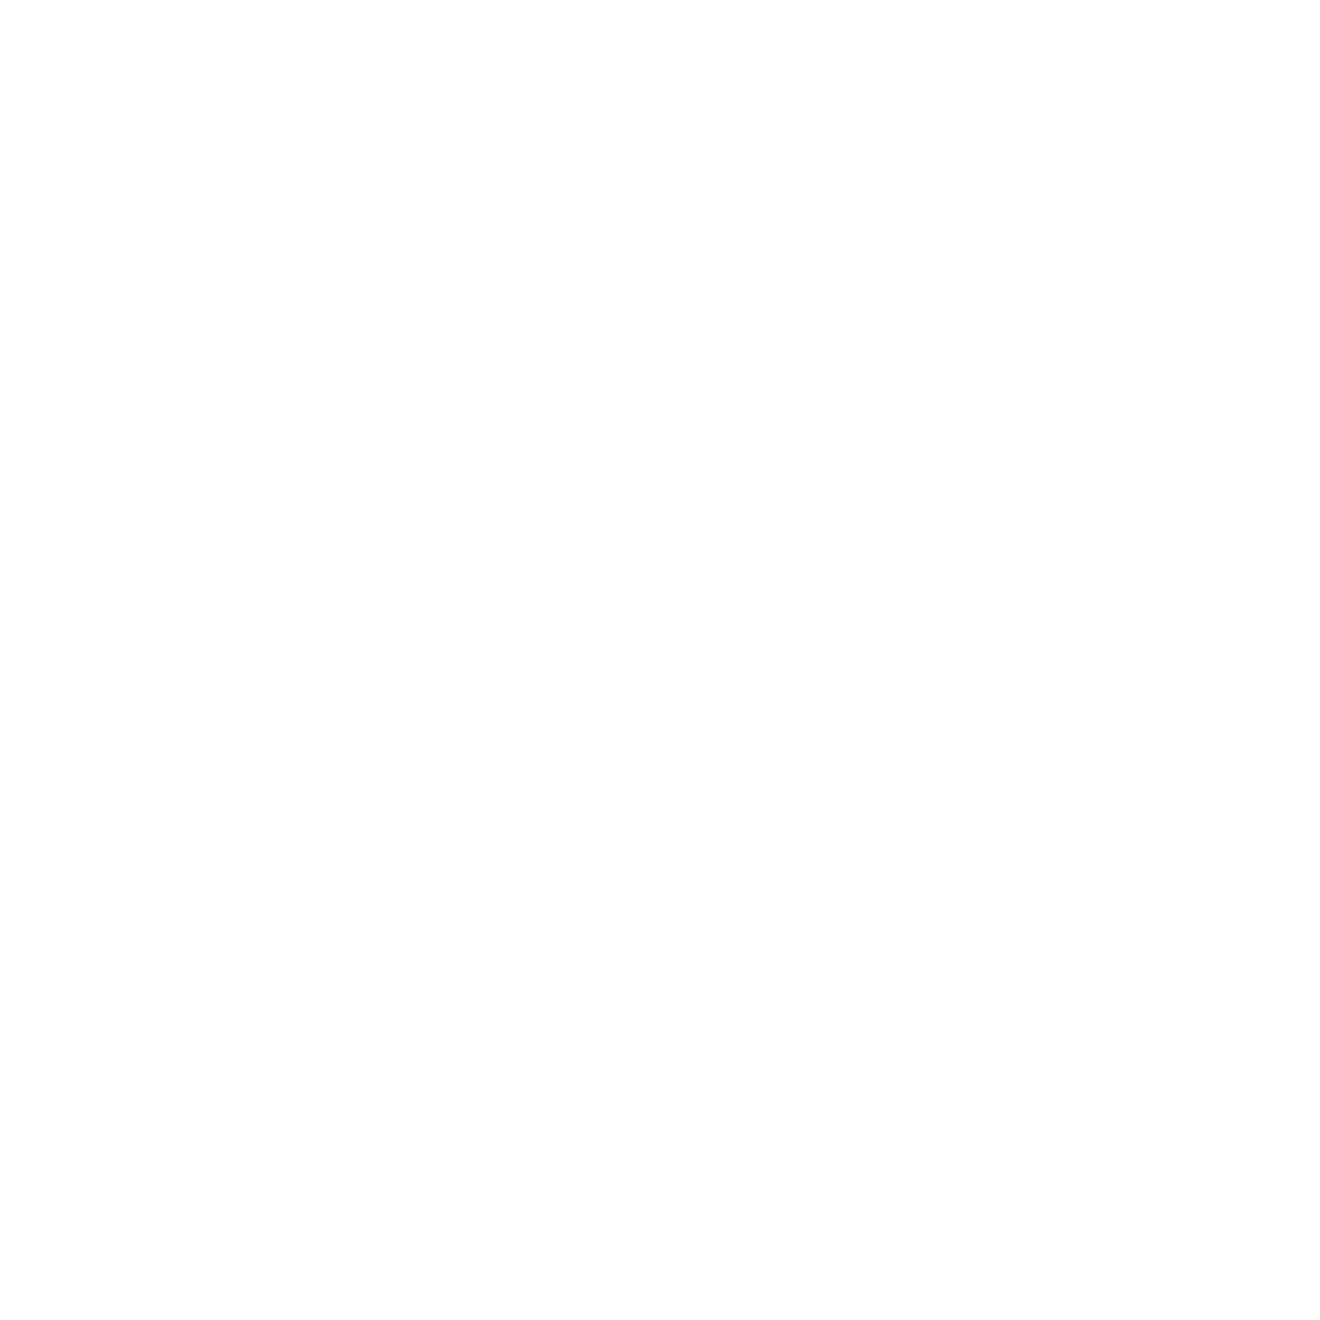

In [19]:
# A better tutorial:
# https://matplotlib.org/gallery/mplot3d/scatter3d.html

# interactive plot
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_3d[y==0, 0], X_3d[y==0, 1], X_3d[y==0, 2], color='r', label='y=0')
ax.scatter(X_3d[y==1, 0], X_3d[y==1, 1], X_3d[y==1, 2], color='b', label='y=1')
ax.set(xlabel='X_3d[:, 0]', ylabel='X_3d[:, 1]', zlabel='X_3d[:, 2]',
       title='PCA plot of Credit Approval dataset')
ax.legend()

The plot looks squished, let's try scaling the features first to see if we get a better view.

<IPython.core.display.Javascript object>


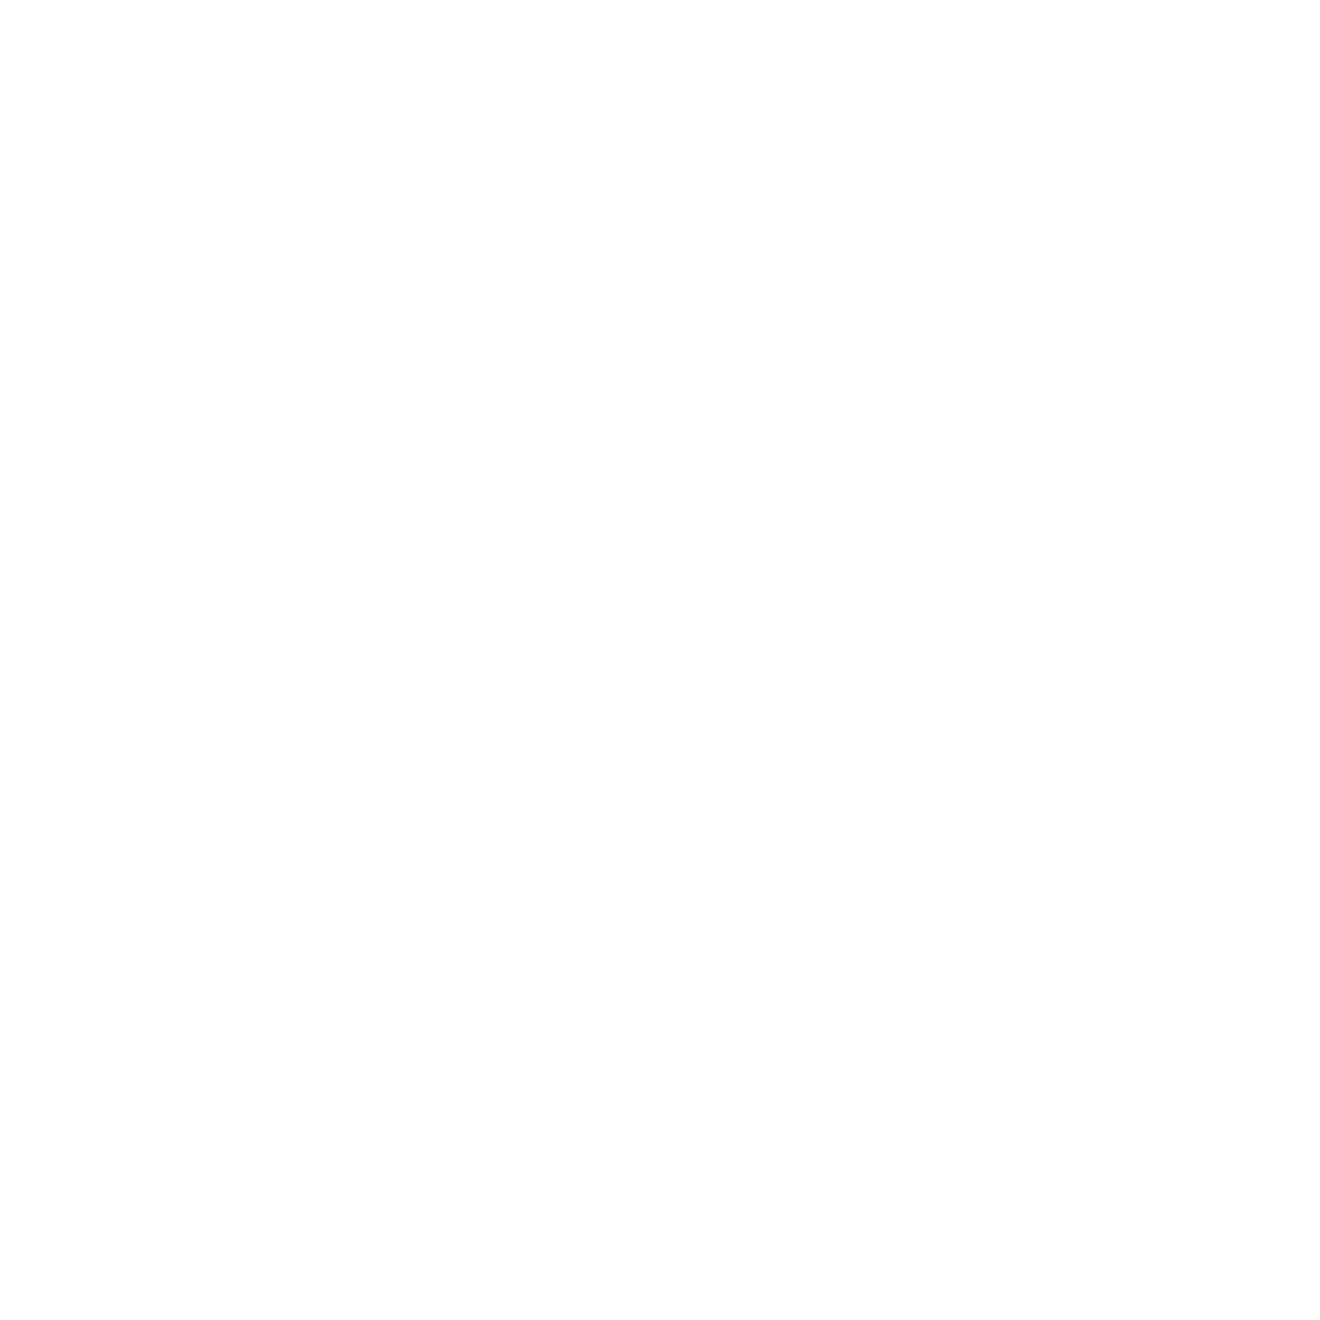

In [20]:
# we are plotting all the datapoints, so we want to fit to the whole dataset
# during training/testing, we'll still fit separately.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=3)
X_3d = pca.fit_transform(X_scaled)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_3d[y==0, 0], X_3d[y==0, 1], X_3d[y==0, 2], color='r', label='y=0')
ax.scatter(X_3d[y==1, 0], X_3d[y==1, 1], X_3d[y==1, 2], color='b', label='y=1')
ax.set(xlabel='X_3d[:, 0]', ylabel='X_3d[:, 1]', zlabel='X_3d[:, 2]',
       title='Scaled PCA plot of Credit Approval dataset')
ax.legend()

Okay, lastly, let's try a 2D plot.

<IPython.core.display.Javascript object>


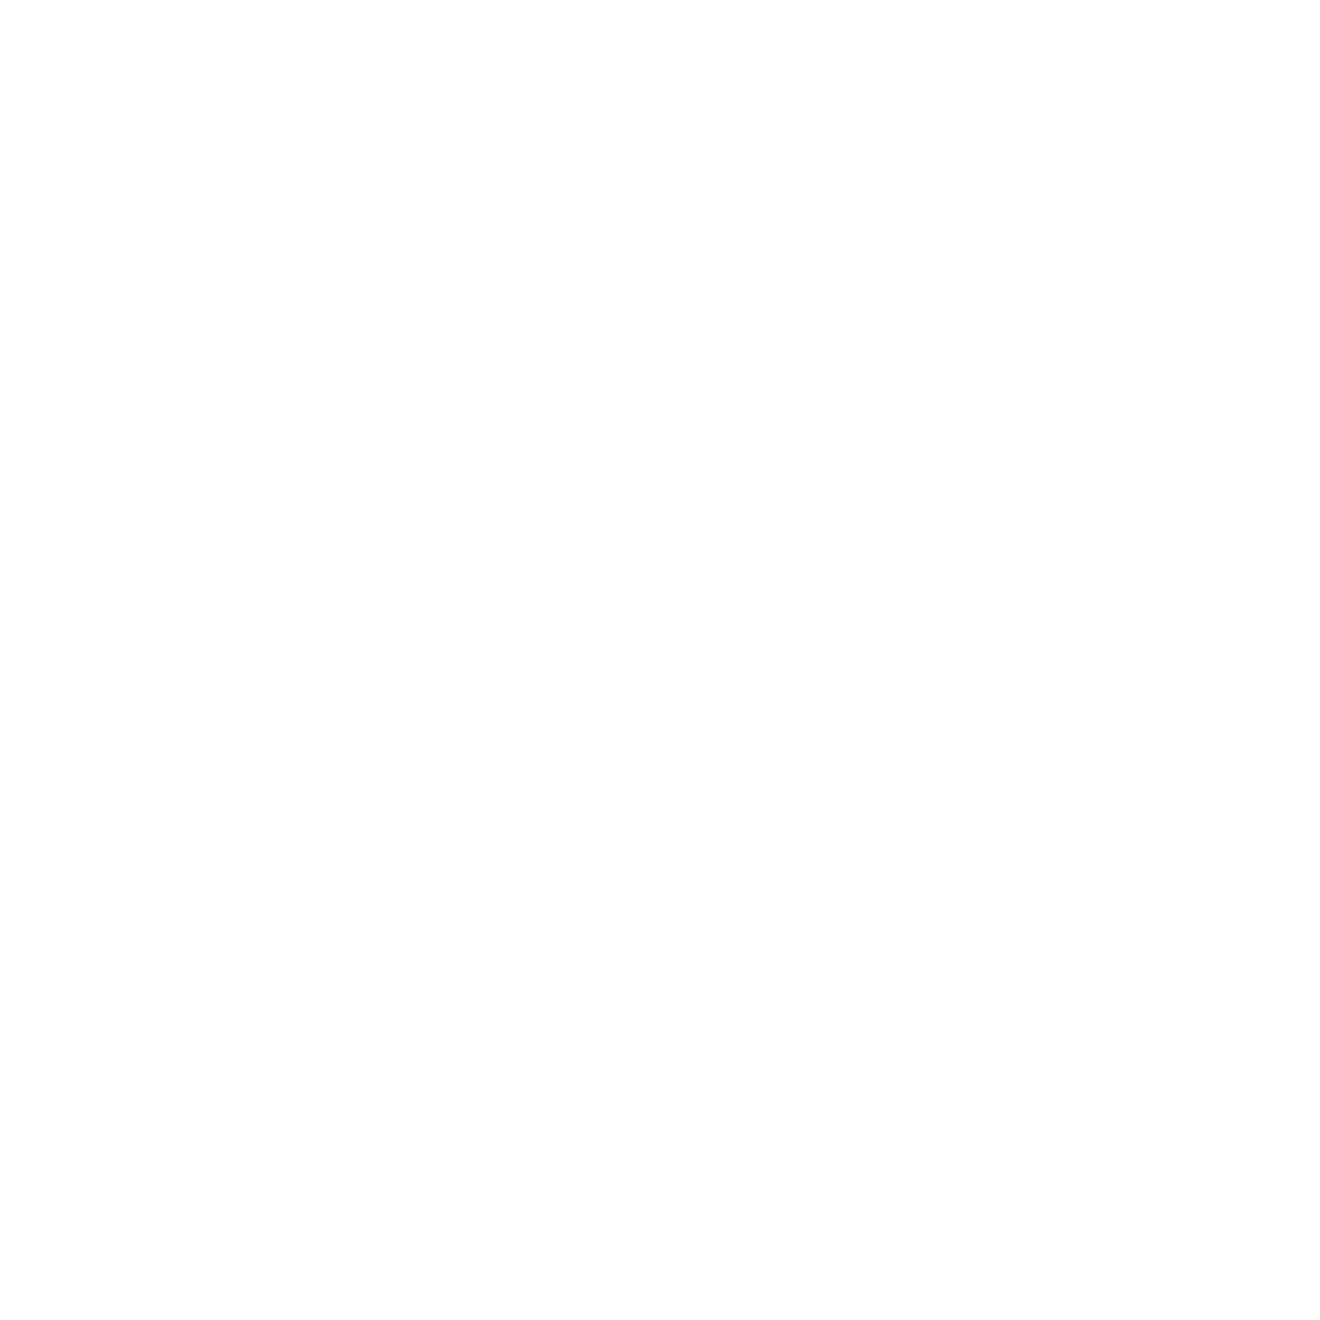

In [21]:
# we are plotting all the datapoints, so we want to fit to the whole dataset
# during training/testing, we'll still fit separately.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

ax.scatter(X_2d[y==0, 0], X_2d[y==0, 1], color='r', label='y=0')
ax.scatter(X_2d[y==1, 0], X_2d[y==1, 1], color='b', label='y=1', alpha=.2) # alpha sets transparency
ax.set(xlabel='X_2d[:, 0]', ylabel='X_2d[:, 1]',
       title='Scaled PCA plot of Credit Approval dataset')
ax.grid()
ax.legend()
plt.show()

As you can see above, visualization is also iterative. 

4. train-test split

In [22]:
# we'll split the unscaled features
# then scale them using just the mean & variance of the training set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

5. scale

In [23]:
X_scaler = StandardScaler()
X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# note that you don't scale y. It's a class output, which has only individual (discrete)
# values such as 0 vs 1.

## Training
6. logistic regression
7. SGD logistic regression

In [24]:
logistic = LogisticRegression(random_state=42)
logistic.fit(X_train_scaled, y_train)
y_pred_logistic = logistic.predict(X_test_scaled)

In [25]:
sgd = SGDClassifier(tol=1e-4, max_iter=1000, verbose=True, random_state=42)
sgd.fit(X_train_scaled, y_train)
y_pred_sgd = sgd.predict(X_test_scaled)

-- Epoch 1
Norm: 291.91, NNZs: 45, Bias: -23.265507, T: 489, Avg. loss: 28.192815
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 228.30, NNZs: 45, Bias: 6.939816, T: 978, Avg. loss: 21.375866
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 204.58, NNZs: 45, Bias: -8.088973, T: 1467, Avg. loss: 16.560159
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 161.08, NNZs: 45, Bias: -0.804990, T: 1956, Avg. loss: 12.815596
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 145.33, NNZs: 45, Bias: -8.341464, T: 2445, Avg. loss: 10.406860
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 127.04, NNZs: 45, Bias: -11.017719, T: 2934, Avg. loss: 10.332437
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 118.80, NNZs: 45, Bias: -6.251891, T: 3423, Avg. loss: 9.573259
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 98.84, NNZs: 45, Bias: -7.779206, T: 3912, Avg. loss: 8.098703
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 94.98, NNZs: 45, Bias: -3.493011, T: 4401, Avg. los

## Validation
8. metrics
9. learning curve
10. prediction

8. metrics

In [26]:
# Classification report. See classification.ipynb for details
print(classification_report(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_sgd))

             precision    recall  f1-score   support

          0       0.90      0.81      0.85        95
          1       0.77      0.87      0.82        69

avg / total       0.84      0.84      0.84       164

             precision    recall  f1-score   support

          0       0.87      0.86      0.87        95
          1       0.81      0.83      0.82        69

avg / total       0.85      0.85      0.85       164



In [27]:
# Confusion matrix. See classification.ipynb for details
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
cm_sgd = confusion_matrix(y_test, y_pred_sgd)

In [28]:
cm_sgd

array([[82, 13],
       [12, 57]], dtype=int64)

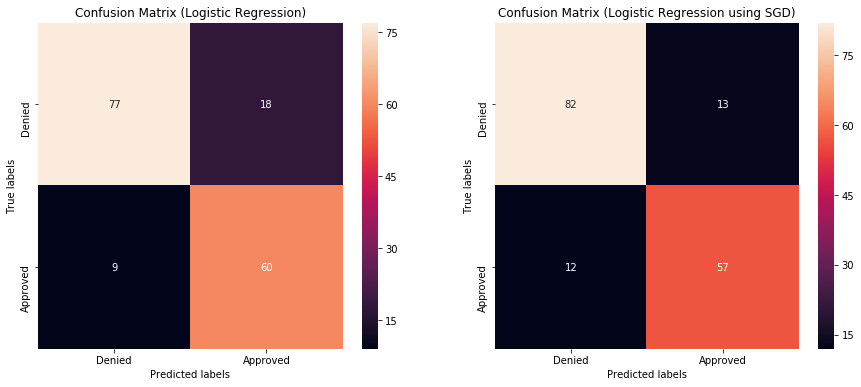

In [29]:
# !conda install -y seaborn

# matplotlib can plot confusion matrices, isn't as easy as seaborn

%matplotlib inline
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
ax = axes.flatten()

# annotate cells with ticks
sns.heatmap(cm_logistic, annot=True, ax=ax[0])
sns.heatmap(cm_sgd, annot=True, ax=ax[1])

ax[0].set(xlabel='Predicted labels', ylabel='True labels', title='Confusion Matrix (Logistic Regression)') 
ax[0].xaxis.set_ticklabels(['Denied', 'Approved'])
ax[0].yaxis.set_ticklabels(['Denied', 'Approved'])

ax[1].set(xlabel='Predicted labels', ylabel='True labels', title='Confusion Matrix (Logistic Regression using SGD)'); 
ax[1].xaxis.set_ticklabels(['Denied', 'Approved'])
ax[1].yaxis.set_ticklabels(['Denied', 'Approved'])
plt.show()

9. learning curve

train_size mean_train_score (3-fold cv) mean_val_score (3-fold cv)
32 1.0 0.8322688117815057
105 0.9365079365079364 0.8403487073952767
178 0.9101123595505617 0.8545763496716994
251 0.9110225763612217 0.8566211855029252
325 0.9046153846153846 0.8751270806277706


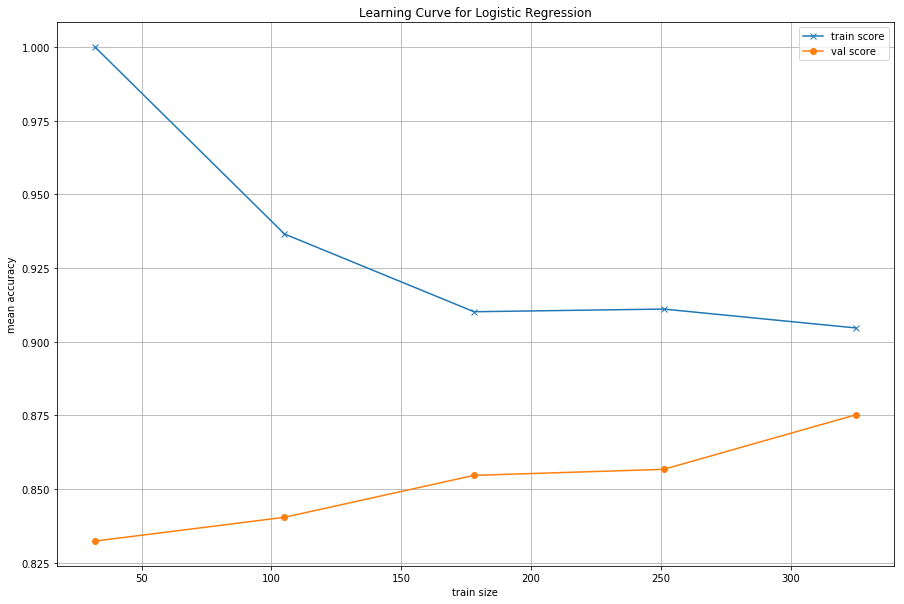

In [30]:
logistic_2 = LogisticRegression(random_state=42)
train_sizes, train_score, val_score = learning_curve(logistic_2, X_train_scaled, y_train)

train_mean = np.mean(train_score, axis=1)
val_mean = np.mean(val_score, axis=1)

print('train_size', 'mean_train_score (3-fold cv)', 'mean_val_score (3-fold cv)')
for train_size, t, m in zip(train_sizes, train_mean, val_mean):
    print(train_size, t, m)

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(train_sizes, train_mean, label='train score', marker='x')
ax.plot(train_sizes, val_mean, label='val score', marker='o')

# LogisticRegression.score() is the mean accuracy
ax.set(xlabel='train size', ylabel='mean accuracy', title='Learning Curve for Logistic Regression')
ax.grid()
ax.legend()
plt.show()    

train_size mean_train_score (3-fold cv) mean_val_score (3-fold cv)
32 1.0 0.8200863132239594
105 0.9269841269841269 0.8157955909256889
178 0.8745318352059925 0.8116554256885445
251 0.8778220451527224 0.8238878020454825
325 0.8543589743589743 0.8404492327131861


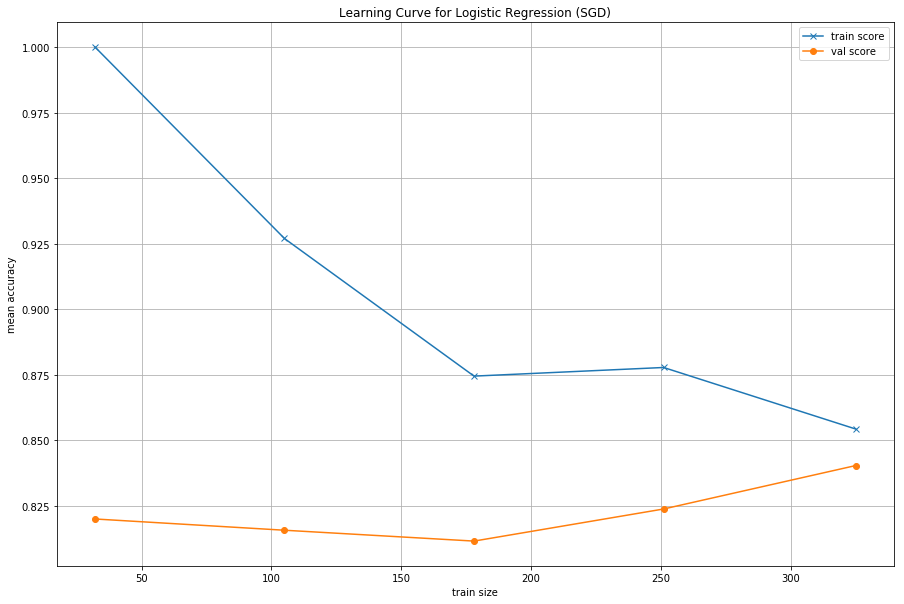

In [31]:
sgd_2 = SGDClassifier(tol=1e-4, max_iter=1000, random_state=42)
train_sizes, train_score, val_score = learning_curve(sgd_2, X_train_scaled, y_train)

train_mean = np.mean(train_score, axis=1)
val_mean = np.mean(val_score, axis=1)

print('train_size', 'mean_train_score (3-fold cv)', 'mean_val_score (3-fold cv)')
for train_size, t, m in zip(train_sizes, train_mean, val_mean):
    print(train_size, t, m)

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(train_sizes, train_mean, label='train score', marker='x')
ax.plot(train_sizes, val_mean, label='val score', marker='o')

# LogisticRegression.score() is the mean accuracy
ax.set(xlabel='train size', ylabel='mean accuracy', title='Learning Curve for Logistic Regression (SGD)')
ax.grid()
ax.legend()
plt.show()    

10. prediction

In [32]:
test = X_test
truth = y_test.values

pred_lr = logistic.predict(test)
pred_sgd = sgd.predict(test)

print('Number of mislabeled points out of %d points:' % test.shape[0])
print('Logistic Regression: %d, Mean Accuracy: %.3f' % ((truth != pred_lr).sum(),
                                              logistic.score(test, truth)))
print('Logistic Regression (SGD): %d, Mean Accuracy: %.3f' % ((truth != pred_sgd).sum(),
                                                            sgd.score(test, truth)))

# print first 10 test datapoints and predictions
print()
print('Truth (1=approved, 0=denied)', truth[:10])
print('Logistic Regression', pred_lr[:10])
print('Logistic Regression with SGD', pred_sgd[:10])

Number of mislabeled points out of 164 points:
Logistic Regression: 53, Mean Accuracy: 0.677
Logistic Regression (SGD): 52, Mean Accuracy: 0.683

Truth (1=approved, 0=denied) [0 0 1 0 0 0 0 1 0 0]
Logistic Regression [1 1 1 1 0 1 1 1 0 1]
Logistic Regression with SGD [1 1 1 1 0 1 0 1 0 1]


## Naive Bayes Classifier

This is a probability-based classifier using the Bayes Theorem.

http://scikit-learn.org/stable/modules/naive_bayes.html

The probability distribution used here is Gaussian. There are other distributions supported (multinomial, bernoulli), depending on how the dataset could be distributed.

             precision    recall  f1-score   support

          0       0.68      0.98      0.80        95
          1       0.93      0.36      0.52        69

avg / total       0.78      0.72      0.68       164



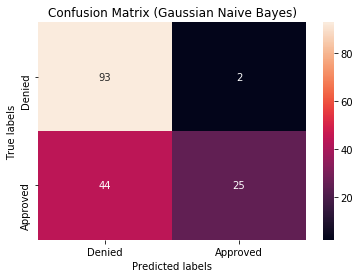

In [33]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)

print(classification_report(y_test, y_pred_nb))
cm_nb = confusion_matrix(y_test, y_pred_nb)

fig, ax = plt.subplots()
sns.heatmap(cm_nb, annot=True, ax=ax)

ax.set(xlabel='Predicted labels', ylabel='True labels', title='Confusion Matrix (Gaussian Naive Bayes)') 
ax.xaxis.set_ticklabels(['Denied', 'Approved'])
ax.yaxis.set_ticklabels(['Denied', 'Approved'])
plt.show()

train_size mean_train_score (3-fold cv) mean_val_score (3-fold cv)
32 0.8958333333333334 0.6834316110713936
105 0.8603174603174604 0.7711555762456056
178 0.7696629213483147 0.7037566603796009
251 0.7941567065073042 0.7591240965806613
325 0.7599999999999999 0.7158507951814351


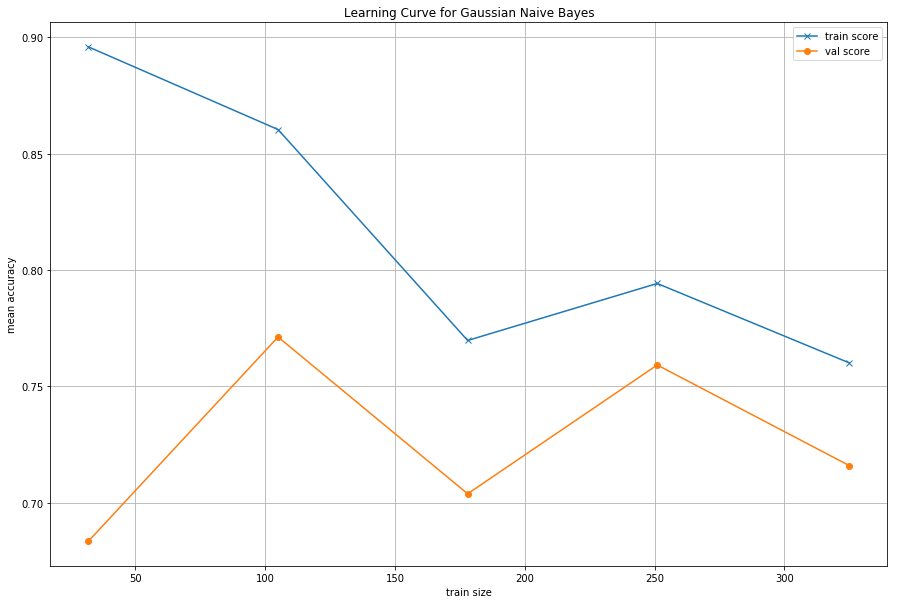

In [34]:
# learning curve
train_sizes, train_score, val_score = learning_curve(GaussianNB(), X_train_scaled, y_train)

train_mean = np.mean(train_score, axis=1)
val_mean = np.mean(val_score, axis=1)

print('train_size', 'mean_train_score (3-fold cv)', 'mean_val_score (3-fold cv)')
for train_size, t, m in zip(train_sizes, train_mean, val_mean):
    print(train_size, t, m)

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(train_sizes, train_mean, label='train score', marker='x')
ax.plot(train_sizes, val_mean, label='val score', marker='o')

ax.set(xlabel='train size', ylabel='mean accuracy', title='Learning Curve for Gaussian Naive Bayes')
ax.grid()
ax.legend()
plt.show()

## Support Vector Classifier

We'll try the SVC classifier with the default kernel (radial basis function). 

This kernel function is used to generate the predictions for a test data value, based on finding the separation boundary (hyperplane) with the largest margin.

http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Other supported kernels are: linear, polynomial.

             precision    recall  f1-score   support

          0       0.92      0.83      0.87        95
          1       0.79      0.90      0.84        69

avg / total       0.87      0.86      0.86       164



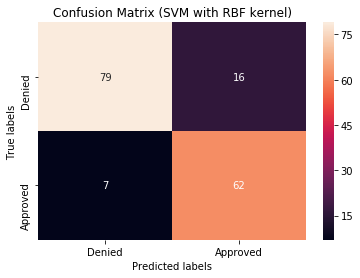

In [35]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_scaled, y_train)
y_pred_svc = svc.predict(X_test_scaled)

print(classification_report(y_test, y_pred_svc))
cm_nb = confusion_matrix(y_test, y_pred_svc)

fig, ax = plt.subplots()
sns.heatmap(cm_nb, annot=True, ax=ax)

ax.set(xlabel='Predicted labels', ylabel='True labels', title='Confusion Matrix (SVM with RBF kernel)') 
ax.xaxis.set_ticklabels(['Denied', 'Approved'])
ax.yaxis.set_ticklabels(['Denied', 'Approved'])
plt.show()

train_size mean_train_score (3-fold cv) mean_val_score (3-fold cv)
32 1.0 0.8302484530184998
105 0.9587301587301588 0.8402986756520598
178 0.9269662921348315 0.8506495505763964
251 0.9216467463479415 0.8485791600701739
325 0.9210256410256411 0.8608118443147622


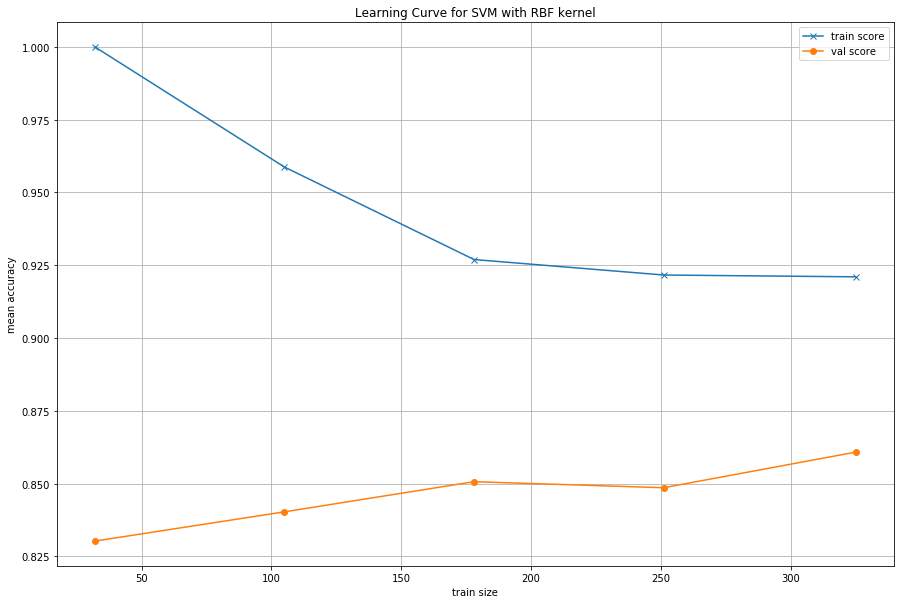

In [36]:
# learning curve
train_sizes, train_score, val_score = learning_curve(SVC(), X_train_scaled, y_train)

train_mean = np.mean(train_score, axis=1)
val_mean = np.mean(val_score, axis=1)

print('train_size', 'mean_train_score (3-fold cv)', 'mean_val_score (3-fold cv)')
for train_size, t, m in zip(train_sizes, train_mean, val_mean):
    print(train_size, t, m)

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(train_sizes, train_mean, label='train score', marker='x')
ax.plot(train_sizes, val_mean, label='val score', marker='o')

ax.set(xlabel='train size', ylabel='mean accuracy', title='Learning Curve for SVM with RBF kernel')
ax.grid()
ax.legend()
plt.show()

## K-nearest Neighbours Classifier

The last classifier we'll try is K-nearest neighbours.

As the name implies, this looks at the k-closest neighbouring labeled datapoints, and determines (by majority vote) which class a test data point belongs to.

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

             precision    recall  f1-score   support

          0       0.84      0.84      0.84        95
          1       0.78      0.78      0.78        69

avg / total       0.82      0.82      0.82       164



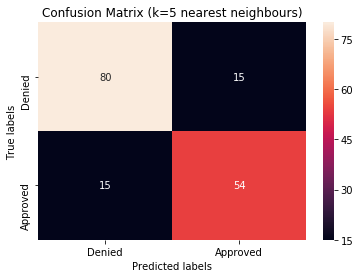

In [37]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(X_train_scaled, y_train)
y_pred_kn = kn.predict(X_test_scaled)

print(classification_report(y_test, y_pred_kn))
cm_nb = confusion_matrix(y_test, y_pred_kn)

fig, ax = plt.subplots()
sns.heatmap(cm_nb, annot=True, ax=ax)

ax.set(xlabel='Predicted labels', ylabel='True labels', title='Confusion Matrix (k=5 nearest neighbours)') 
ax.xaxis.set_ticklabels(['Denied', 'Approved'])
ax.yaxis.set_ticklabels(['Denied', 'Approved'])
plt.show()

train_size mean_train_score (3-fold cv) mean_val_score (3-fold cv)
32 0.8541666666666666 0.8017181978227418
105 0.8984126984126983 0.7974029984562513
178 0.8520599250936329 0.8260210016324203
251 0.8711819389110226 0.8321564327890495
325 0.8676923076923077 0.838316494957724


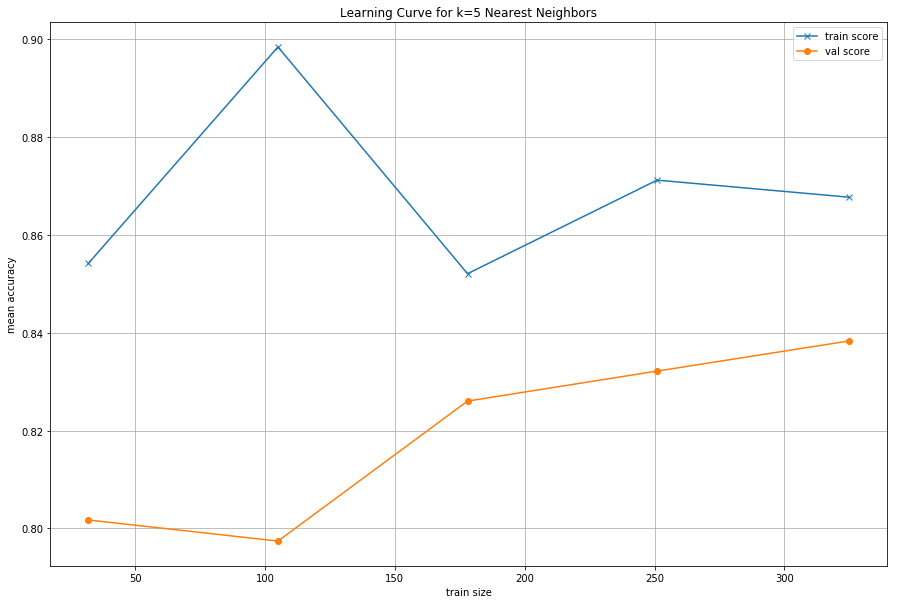

In [38]:
# learning curve
train_sizes, train_score, val_score = learning_curve(KNeighborsClassifier(), X_train_scaled, y_train)

train_mean = np.mean(train_score, axis=1)
val_mean = np.mean(val_score, axis=1)

print('train_size', 'mean_train_score (3-fold cv)', 'mean_val_score (3-fold cv)')
for train_size, t, m in zip(train_sizes, train_mean, val_mean):
    print(train_size, t, m)

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(train_sizes, train_mean, label='train score', marker='x')
ax.plot(train_sizes, val_mean, label='val score', marker='o')

ax.set(xlabel='train size', ylabel='mean accuracy', title='Learning Curve for k=5 Nearest Neighbors')
ax.grid()
ax.legend()
plt.show()

## Visualizing Boundaries

In classification (and clustering) problems, it is helpful to visualize how each model defines the boundaries separating the classes.

This can also help give some intuition on what each classifier does, and more helpfully, how the boundaries can change with different hyperparameters.

To do this, we fit each model on the 2-dimensional features and then plot a contour.

In [39]:
# Helper plotting functions to plot boundaries
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Args:
        x: data to base x-axis meshgrid on
        y: data to base y-axis meshgrid on
        h: stepsize for meshgrid, optional

    Returns:
        xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Args:
        ax: matplotlib axes object
        clf: a classifier
        xx: meshgrid ndarray
        yy: meshgrid ndarray
        params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [40]:
# For visualization purposes only
pca = PCA(n_components=2)
X_train_scaled_2d = pca.fit_transform(X_train_scaled)

X0, X1 = X_train_scaled_2d[:, 0], X_train_scaled_2d[:, 1]
xx, yy = make_meshgrid(X0, X1)

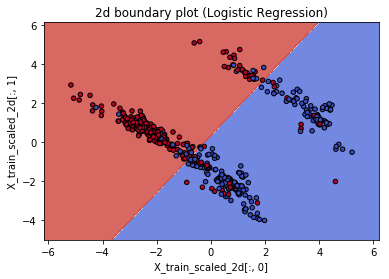

In [41]:
# Logistic Regression
logistic_2d = LogisticRegression()
logistic_2d.fit(X_train_scaled_2d, y_train)

fig, ax = plt.subplots()
plot_contours(ax, logistic_2d, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set(xlabel='X_train_scaled_2d[:, 0]', ylabel='X_train_scaled_2d[:, 1]',
       title='2d boundary plot (Logistic Regression)')
plt.show()

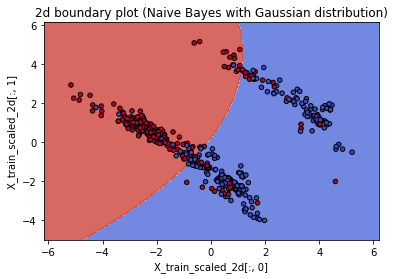

In [42]:
# Gaussian Naive Bayes
nb_2d = GaussianNB()
nb_2d.fit(X_train_scaled_2d, y_train)

fig, ax = plt.subplots()
plot_contours(ax, nb_2d, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set(xlabel='X_train_scaled_2d[:, 0]', ylabel='X_train_scaled_2d[:, 1]',
       title='2d boundary plot (Naive Bayes with Gaussian distribution)')
plt.show()

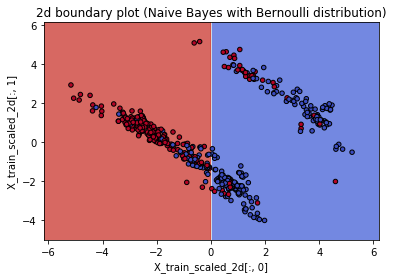

In [43]:
# Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB

bnb_2d = BernoulliNB()
bnb_2d.fit(X_train_scaled_2d, y_train)

fig, ax = plt.subplots()
plot_contours(ax, bnb_2d, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set(xlabel='X_train_scaled_2d[:, 0]', ylabel='X_train_scaled_2d[:, 1]',
       title='2d boundary plot (Naive Bayes with Bernoulli distribution)')
plt.show()

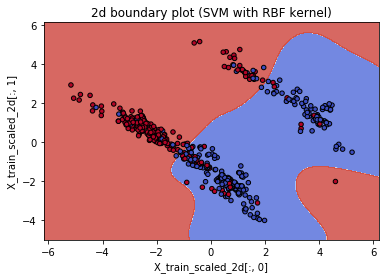

In [44]:
# SVM with RBF kernel
svc_2d = SVC()
svc_2d.fit(X_train_scaled_2d, y_train)

fig, ax = plt.subplots()
plot_contours(ax, svc_2d, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set(xlabel='X_train_scaled_2d[:, 0]', ylabel='X_train_scaled_2d[:, 1]',
       title='2d boundary plot (SVM with RBF kernel)')
plt.show()

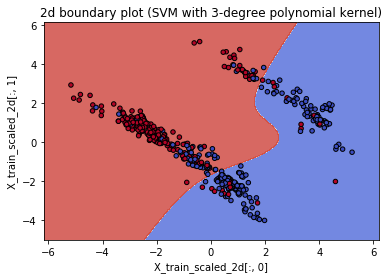

In [45]:
# SVM with polynomial kernel
svc_2d_poly = SVC(kernel='poly') # defaults to degrees=3
svc_2d_poly.fit(X_train_scaled_2d, y_train)

fig, ax = plt.subplots()
plot_contours(ax, svc_2d_poly, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set(xlabel='X_train_scaled_2d[:, 0]', ylabel='X_train_scaled_2d[:, 1]',
       title='2d boundary plot (SVM with 3-degree polynomial kernel)')
plt.show()

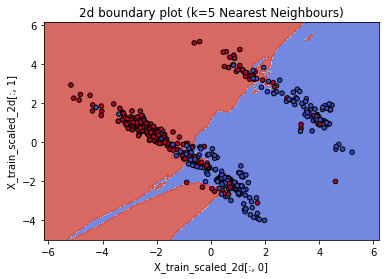

In [46]:
# K-nearest neighbours, k=5 (default)
kn_2d = KNeighborsClassifier()
kn_2d.fit(X_train_scaled_2d, y_train)

fig, ax = plt.subplots()
plot_contours(ax, kn_2d, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set(xlabel='X_train_scaled_2d[:, 0]', ylabel='X_train_scaled_2d[:, 1]',
       title='2d boundary plot (k=5 Nearest Neighbours)')
plt.show()

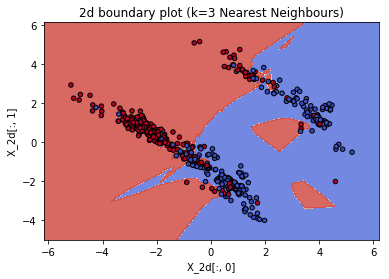

In [47]:
# K-nearest neighbours, k=3
kn_2d = KNeighborsClassifier(n_neighbors=3)
kn_2d.fit(X_train_scaled_2d, y_train)

fig, ax = plt.subplots()
plot_contours(ax, kn_2d, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set(xlabel='X_2d[:, 0]', ylabel='X_2d[:, 1]',
       title='2d boundary plot (k=3 Nearest Neighbours)')
plt.show()

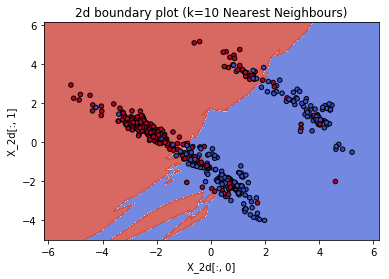

In [48]:
# K-nearest neighbours, k=10
kn_2d = KNeighborsClassifier(n_neighbors=10)
kn_2d.fit(X_train_scaled_2d, y_train)

fig, ax = plt.subplots()
plot_contours(ax, kn_2d, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set(xlabel='X_2d[:, 0]', ylabel='X_2d[:, 1]',
       title='2d boundary plot (k=10 Nearest Neighbours)')
plt.show()

### Classifier Quality

Area under ROC curve - the larger the better.

![example](https://upload.wikimedia.org/wikipedia/commons/thumb/3/36/ROC_space-2.png/1024px-ROC_space-2.png)

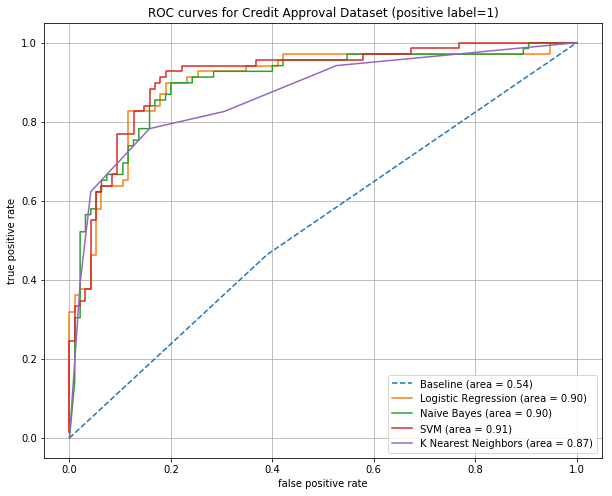

In [90]:
# For comparison, let's see how an ROC curve for a dummy classifier looks like
# http://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html
from sklearn.dummy import DummyClassifier

# Baseline
baseline = DummyClassifier(random_state=42)
baseline.fit(X_train_scaled, y_train)
y_confidence_baseline = baseline.predict_proba(X_test_scaled)

# predict_proba: prediction confidence
# decision_function: distance to the decision boundary/hyperplane

# y_confidence_baseline[:, 0] returns probabilities for class 0
# y_confidence_baseline[:, 1] returns probabilities for class 1
fpr_baseline, tpr_baseline, _ = roc_curve(y_test, y_confidence_baseline[:, 1], pos_label=1)
auc_baseline = auc(fpr_baseline, tpr_baseline)

# Logistic Regression
y_confidence_logistic = logistic.predict_proba(X_test_scaled)
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_confidence_logistic[:, 1], pos_label=1)
auc_logistic = auc(fpr_logistic, tpr_logistic)

# Naive Bayes
y_confidence_nb = nb.predict_proba(X_test_scaled)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_confidence_nb[:, 1], pos_label=1)
auc_nb = auc(fpr_nb, tpr_nb)

# Support Vector Machine
y_confidence_svc = svc.decision_function(X_test_scaled)
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_confidence_svc, pos_label=1)
auc_svc = auc(fpr_svc, tpr_svc)

# K-nearest Neighbor
y_confidence_kn = kn.predict_proba(X_test_scaled)
fpr_kn, tpr_kn, _ = roc_curve(y_test, y_confidence_kn[:, 1], pos_label=1)
auc_kn = auc(fpr_kn, tpr_kn)

# Plot the ROCs
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(fpr_baseline, tpr_baseline, label='Baseline (area = %0.2f)' % auc_baseline,
        linestyle='dashed')
ax.plot(fpr_logistic, tpr_logistic, label='Logistic Regression (area = %0.2f)' % auc_logistic)
ax.plot(fpr_nb, tpr_nb, label='Naive Bayes (area = %0.2f)' % auc_nb)
ax.plot(fpr_svc, tpr_svc, label='SVM (area = %0.2f)' % auc_svc)
ax.plot(fpr_kn, tpr_kn, label='K Nearest Neighbors (area = %0.2f)' % auc_kn)

# bigger area is better
ax.set(xlabel='false positive rate', ylabel='true positive rate',
       title='ROC curves for Credit Approval Dataset (positive label=1)')
ax.legend()
ax.grid()
plt.show()

### ROC curve - how is it derived

- y-axis = True positive rate
- x-axis = False positive rate

What it does:
1. Gets a subset of thresholds from the confidences or decision_function output (how far from decision boundary) from predicting X_test_scaled
2. Sorts the thresholds, dropping duplicates.
3. At each threshold, preform a cumulative sum to get its true positive count. Derive the false positive count from the true positive count.
4. Compute the tpr and fpr from the counts.

Source:
- https://github.com/scikit-learn/scikit-learn/blob/a24c8b46/sklearn/metrics/ranking.py#L453

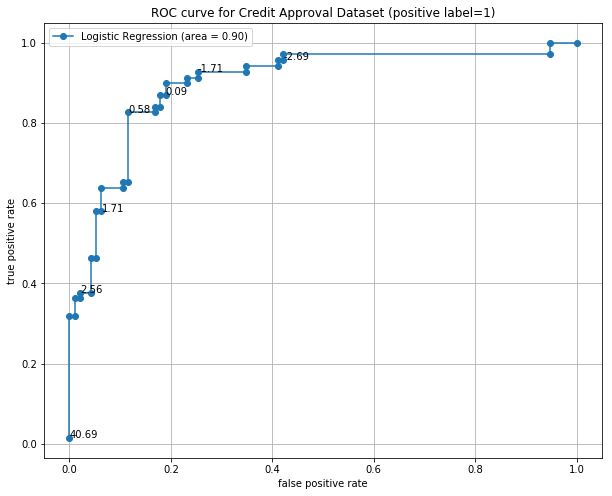

In [80]:
fpr_logistic, tpr_logistic, threshold = roc_curve(y_test, y_confidence_logistic,
                                                  pos_label=1)

fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(fpr_logistic, tpr_logistic, label='Logistic Regression (area = %0.2f)' % auc_logistic,
       marker='o')

for i, (th, fpr, tpr) in enumerate(zip(threshold, fpr_logistic, tpr_logistic)):
    # label every few points
    if i % 5 == 0:
        ax.annotate('%.2f' % th, (fpr, tpr))

ax.set(xlabel='false positive rate', ylabel='true positive rate',
       title='ROC curve for Credit Approval Dataset (positive label=1)')

ax.legend()
ax.grid()
plt.show()

In [82]:
print(threshold[:5]) # prediction confidence values
print(fpr_logistic[:5]) # false positive rates
print(tpr_logistic[:5]) # true positive rates

[40.68734785  3.49678021  2.87598649  2.70265471  2.61689871]
[0.         0.         0.01052632 0.01052632 0.02105263]
[0.01449275 0.31884058 0.31884058 0.36231884 0.36231884]


In [83]:
# prediction confidence for each X_test_scaled
# either the estimator.predict_proba() or the estimator.decision_function()
#
# only a subset will be selected to be thresholds
# (drop colinear (same line) and duplicates)
#
print(y_confidence_logistic)

[ 1.26648058 -0.53908326  6.3561703  -3.07479982 -4.36619384 -4.26829393
 -3.93879261  7.8915281   0.55496054 -4.02748164  2.10871361 -1.00865261
 -2.96133531  2.70265471 -5.16038405  1.13445992  2.85729204 -3.99163207
  1.16775581 -3.73643735  2.86509966  1.05312515 -1.37943524 -6.08164462
  0.94452249  1.94506556 -2.6928371  -2.47272914 -2.68156862 -3.92866628
  5.23212164 -1.79229458  0.87854656  5.61146578 -3.95489941  1.70339033
  2.5647618  -1.7766569  -3.88358992 -3.42040837 -3.82303389 -3.12597534
  0.14648956 -2.52891657 -0.1387292   2.1914027  -4.87417706  0.47580474
 -3.46271117  1.16968194 -0.24452245 -3.29727071 40.68734785 -2.96828575
 -6.62837511  1.73250961 -5.00138804  1.07339678 -0.6184382   0.87786066
  0.16256243 -6.74874284 -4.13542363  1.08451837  6.5758063   0.45313971
 -4.68593258 -6.14899537 -3.64310119 -1.48008715 -4.19510491  0.43469453
 23.96243459 -2.06511288 -2.77842109 -2.2455207   1.70815883  1.69050465
  1.91574834 -3.67641049 19.69118102  1.8934502  -2